In [ ]:
from tensorflow import keras
import os
from google.colab import drive
import random as rn
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


# **Dataset load and preprocessing**

## Loading test set and preprocessing

In [ ]:
out_path = '/content/drive/My Drive/Ritorti[_Pasco]/project/numpy_data'

def load_testing():
  images = np.load(os.path.join(out_path,'public_test_tensor.npy'))
  labels = np.load(os.path.join(out_path,'public_test_labels.npy'))
  return images,labels

test_images, test_labels = load_testing()
test_labels_ben_mal = []

#testing ben-mal
for la in test_labels:
  if la == 1 or la == 3: #benign -> 0
    test_labels_ben_mal.append(0)
  elif la == 2 or la == 4: #malignant -> 1
    test_labels_ben_mal.append(1)

test_labels_ben_mal = np.array(test_labels_ben_mal)

## Loading predictions from pre-saved csv file

In [ ]:
dir_data_store ="/content/drive/My Drive/Ritorti[_Pasco]/data_store"

y_pred32 = np.loadtxt(os.path.join(dir_data_store,"predictions_32.csv"))
y_pred32 = y_pred32.astype(int)
y_pred22 = np.loadtxt(os.path.join(dir_data_store,"predictions_22.csv"))
y_pred22 = y_pred22.astype(int)

unique, counts = np.unique(test_labels_ben_mal, return_counts=True)
print('true',dict(zip(unique, counts)))
unique, counts = np.unique(y_pred32, return_counts=True)
print('pred_mod32',dict(zip(unique, counts)))
unique, counts = np.unique(y_pred22, return_counts=True)
print('pred_mod22',dict(zip(unique, counts)))

true {0: 219, 1: 117}
pred_mod32 {0: 184, 1: 152}
pred_mod22 {0: 218, 1: 118}


# **Execute the ensamble classification**

In [ ]:
final_pred = 0.5*(y_pred22+y_pred32)

In [ ]:
final_pred = np.round(final_pred)
final_pred = final_pred.astype(int)
final_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
unique, counts = np.unique(final_pred, return_counts=True)
print('final_pred',dict(zip(unique, counts)))

final_pred {0: 263, 1: 73}


# **Evaluating the model with the test set**

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(test_labels_ben_mal,final_pred)

array([[193,  26],
       [ 70,  47]])

In [ ]:
# accuracy: (TP+TN)/(TP+FP+FN+TN): percentage of correctly predicted samples
metrics.accuracy_score(test_labels_ben_mal,final_pred)

0.7142857142857143

In [ ]:
# precision: TP/(TP+FP): The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
metrics.precision_score(test_labels_ben_mal,final_pred)

0.6438356164383562

In [ ]:
# recall: TP/(TP+FN): The recall is intuitively the ability of the classifier to find all the positive samples.
metrics.recall_score(test_labels_ben_mal,final_pred)

0.4017094017094017

In [ ]:
# f1-score: 2*(precision*recall)/(precision + recall). The F1-score is the harmonic mean of precision and sensitivity
metrics.f1_score(test_labels_ben_mal,final_pred)

0.4947368421052632

In [ ]:
# classification report: Build a text report showing the main classification metrics
print(metrics.classification_report(test_labels_ben_mal,final_pred))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80       219
           1       0.64      0.40      0.49       117

    accuracy                           0.71       336
   macro avg       0.69      0.64      0.65       336
weighted avg       0.70      0.71      0.69       336



In [ ]:
fpr,tpr,th = metrics.roc_curve(test_labels_ben_mal,final_pred)
roc_auc = metrics.roc_auc_score(test_labels_ben_mal,final_pred)

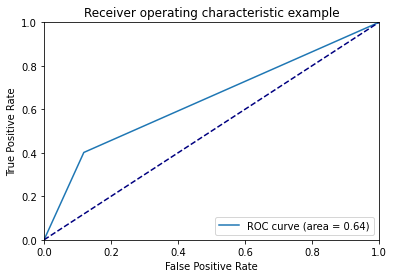

In [ ]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
#plt.savefig(os.path.join(dir_img,"ROC_curve.png"))
plt.show()